In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("kaggle/autos.csv")

df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [55]:
df2 = df[df.powerPS==190]
years = df2[["yearOfRegistration"]].groupby(["yearOfRegistration"]).size().reset_index(name="counts")


q75, q25 = np.percentile(df2.price.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

years
#(min, max)

,yearOfRegistration,counts
0,1965,2
1,1969,1
2,1974,1
3,1975,1
4,1976,2
5,1979,1
6,1980,1
7,1981,2
8,1986,3
9,1987,3


In [60]:
df2[["model"]].groupby(["model"]).size().reset_index(name="counts")



,model,counts
0,5er,11
1,a3,1
2,a4,82
3,a5,26
4,a6,24
5,andere,6
6,discovery,13
7,e_klasse,39
8,m_klasse,28
9,passat,1


In [64]:
df3 = df2[( (df2["price"]>=min) & (df2["price"]<=max) & (df2["yearOfRegistration"]==2008) & (df2["model"]=="a4"))]


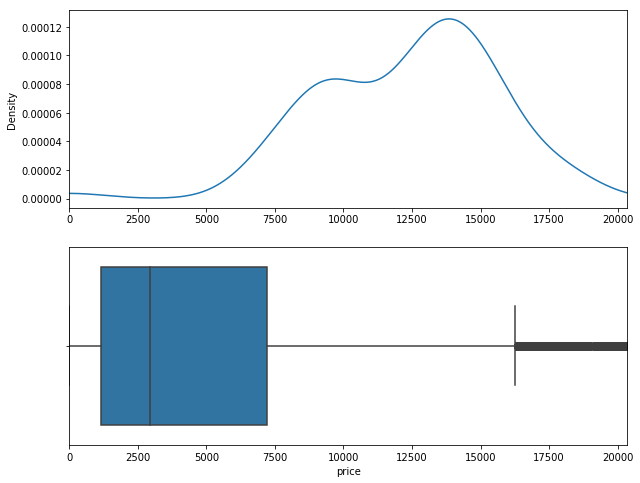

In [65]:
#plt.figure()
#plt.bplot(df2.kilometer/1000, df2.price, "bx")
#plt.boxplot(df3.price)
#plt.show()

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df3["price"].min(), df3["price"].max()*1.1)
 
ax = df3["price"].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df3["price"].min(), df3["price"].max()*1.1)
sns.boxplot(x=df["price"])

plt.show()

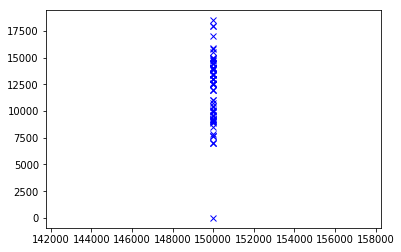

In [70]:
df4 = df3[df3["kilometer"]>140000]
plt.figure()
plt.plot(df4["kilometer"], df4["price"], "bx")
plt.show()